In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
#df = pd.read_csv('C:/Users/jeanl/Desktop/trial.csv',index_col=False)
df = pd.read_csv("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/UNDP/UNDP_clean_data.csv")


In [3]:
df

,Unnamed: 0,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,UNDP,"Local, National, Global\n: \nEvaluative \nEvidence of Scaling up the SDGs\n Authors:\n Juha I....","['Local,', 'National,', 'Global', ':', 'Evaluative', 'Evidence', 'of', 'Scaling', 'up', 'the', '...","Local, National, Global : Evaluative Evidence of Scaling up the SDGs Authors: Juha I. Uitto, Dir...",en,"['Local', ',', 'National', ',', 'Global', ':', 'Evaluative', 'Evidence', 'of', 'Scaling', 'up', ...","['local', ',', 'national', ',', 'global', ':', 'evaluative', 'evidence', 'of', 'scaling', 'up', ...","['local', 'national', 'global', 'evaluative', 'evidence', 'of', 'scaling', 'up', 'the', 'sdgs', ...","['local', 'national', 'global', 'evaluative', 'evidence', 'scaling', 'sdgs', 'authors', 'juha', ...","[('local', 'JJ'), ('national', 'JJ'), ('global', 'JJ'), ('evaluative', 'JJ'), ('evidence', 'NN')...","[('local', 'a'), ('national', 'a'), ('global', 'a'), ('evaluative', 'a'), ('evidence', 'n'), ('s...","['local', 'national', 'global', 'evaluative', 'evidence', 'scale', 'sdgs', 'author', 'juha', 'i...."


In [4]:
df = df[['cluster', 'lemmatized']]
df

,cluster,lemmatized
0,UNDP,"['local', 'national', 'global', 'evaluative', 'evidence', 'scale', 'sdgs', 'author', 'juha', 'i...."


## Sentiment Analysis

In [5]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df

,cluster,lemmatized,lemma_str
0,UNDP,"['local', 'national', 'global', 'evaluative', 'evidence', 'scale', 'sdgs', 'author', 'juha', 'i....","[ ' l o c a l ' , ' n a t i o n a l ' , ' g l o b a l ' , ' e v a l u a t i v e ' , ' e ..."


In [6]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df

,cluster,lemmatized,lemma_str,sentiment
0,UNDP,"['local', 'national', 'global', 'evaluative', 'evidence', 'scale', 'sdgs', 'author', 'juha', 'i....","[ ' l o c a l ' , ' n a t i o n a l ' , ' g l o b a l ' , ' e v a l u a t i v e ' , ' e ...",0.34375


## UNDP

### Data Exploration

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [7]:
corpus= df['lemmatized']

In [8]:
corpus

0    ['local', 'national', 'global', 'evaluative', 'evidence', 'scale', 'sdgs', 'author', 'juha', 'i....
Name: lemmatized, dtype: object

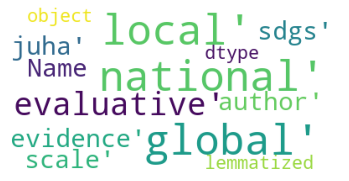

In [9]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## Text preparation

Text in the corpus needs to be converted to a format that can be interpreted by the machine learning algorithms. 
There are 2 parts of this conversion

— Tokenisation and Vectorisation.
Tokenisation is the process of converting the continuous text into a list of words. 
The list of words is then converted to a matrix of integers by the process of vectorisation. Vectorisation is also called feature extraction.

For text preparation we use the bag of words model which ignores the sequence of the words and only considers word frequencies.

### Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words.
We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=1.0, min_df=1, max_features=None, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [11]:
list(cv.vocabulary_.keys())[:50]


['local',
 'national',
 'global',
 'evaluative',
 'evidence',
 'scale',
 'sdgs',
 'author',
 'juha',
 'uitto',
 'director',
 'independent',
 'evaluation',
 'office',
 'environment',
 'facility',
 'gef',
 'indran',
 'naidoo',
 'unite',
 'nation',
 'development',
 'programme',
 'undp',
 'american',
 'association',
 'geographer',
 'annual',
 'meeting',
 'april',
 '2019',
 'washington',
 'page',
 'united',
 'topic',
 'apply',
 'geography',
 'human',
 'keywords',
 'sustainable',
 'international',
 'session',
 'type',
 'paper',
 'day',
 'start',
 'end',
 'time',
 '30',
 'pm']

### Unigram Bigram and trigram 

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

[Text(0, 0, 'development'),
 Text(1, 0, 'inequality'),
 Text(2, 0, 'country'),
 Text(3, 0, 'income'),
 Text(4, 0, 'human'),
 Text(5, 0, '2019'),
 Text(6, 0, 'percent'),
 Text(7, 0, 'change'),
 Text(8, 0, 'evaluation'),
 Text(9, 0, 'report'),
 Text(10, 0, 'use'),
 Text(11, 0, 'data'),
 Text(12, 0, 'social'),
 Text(13, 0, 'global'),
 Text(14, 0, 'policy'),
 Text(15, 0, 'climate'),
 Text(16, 0, '2018'),
 Text(17, 0, 'gender'),
 Text(18, 0, 'high'),
 Text(19, 0, 'woman')]

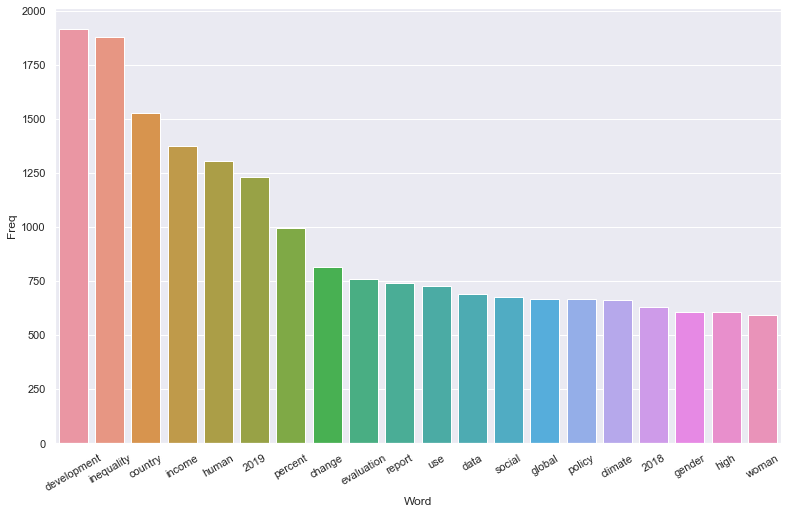

In [12]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                    Bi-gram  Freq
0         human development   975
1            climate change   392
2        development report   331
3             united nation   232
4               report 2019   185
5         income inequality   175
6          inequality human   170
7                  new york   165
8                   con ict   162
9   sustainable development   137
10               40 percent   136
11          develop country   135
12               work paper   133
13               world bank   124
14             united state   123
15              social norm   122
16            income wealth   120
17          life expectancy   120
18            washington dc   117
19                    of ce   117


[Text(0, 0, 'human development'),
 Text(1, 0, 'climate change'),
 Text(2, 0, 'development report'),
 Text(3, 0, 'united nation'),
 Text(4, 0, 'report 2019'),
 Text(5, 0, 'income inequality'),
 Text(6, 0, 'inequality human'),
 Text(7, 0, 'new york'),
 Text(8, 0, 'con ict'),
 Text(9, 0, 'sustainable development'),
 Text(10, 0, '40 percent'),
 Text(11, 0, 'develop country'),
 Text(12, 0, 'work paper'),
 Text(13, 0, 'world bank'),
 Text(14, 0, 'united state'),
 Text(15, 0, 'social norm'),
 Text(16, 0, 'income wealth'),
 Text(17, 0, 'life expectancy'),
 Text(18, 0, 'washington dc'),
 Text(19, 0, 'of ce')]

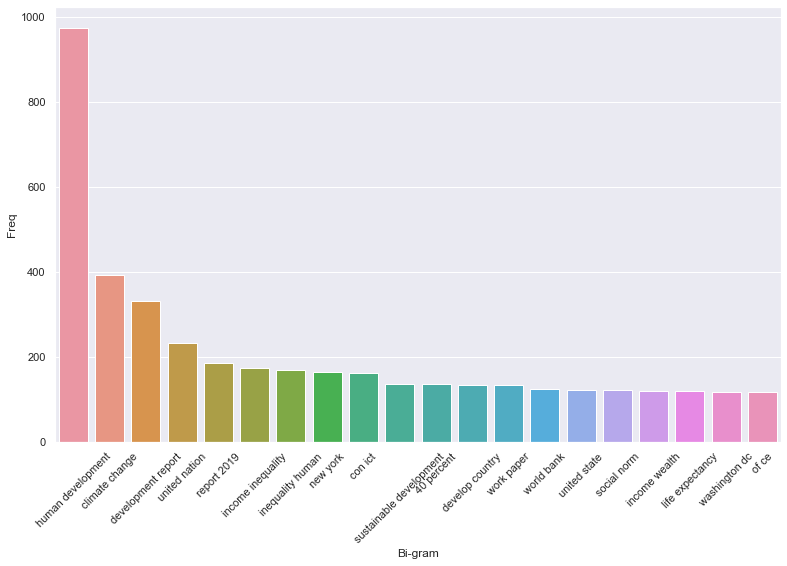

In [13]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0       human development report   324
1        development report 2019   179
2   inequality human development   149
3          development report of    98
4                   report of ce    98
5         high human development    93
6              bottom 40 percent    90
7      human development country    86
8          low human development    67
9                 top 10 percent    67
10     united nation development    61
11  nation development programme    60
12     world inequality database    59
13  sustainable development goal    53
14       human development index    48
15      national bureau economic    46
16      bureau economic research    46
17   economic research cambridge    45
18                 http hdr undp    44
19                  hdr undp org    44


[Text(0, 0, 'human development report'),
 Text(1, 0, 'development report 2019'),
 Text(2, 0, 'inequality human development'),
 Text(3, 0, 'development report of'),
 Text(4, 0, 'report of ce'),
 Text(5, 0, 'high human development'),
 Text(6, 0, 'bottom 40 percent'),
 Text(7, 0, 'human development country'),
 Text(8, 0, 'low human development'),
 Text(9, 0, 'top 10 percent'),
 Text(10, 0, 'united nation development'),
 Text(11, 0, 'nation development programme'),
 Text(12, 0, 'world inequality database'),
 Text(13, 0, 'sustainable development goal'),
 Text(14, 0, 'human development index'),
 Text(15, 0, 'national bureau economic'),
 Text(16, 0, 'bureau economic research'),
 Text(17, 0, 'economic research cambridge'),
 Text(18, 0, 'http hdr undp'),
 Text(19, 0, 'hdr undp org')]

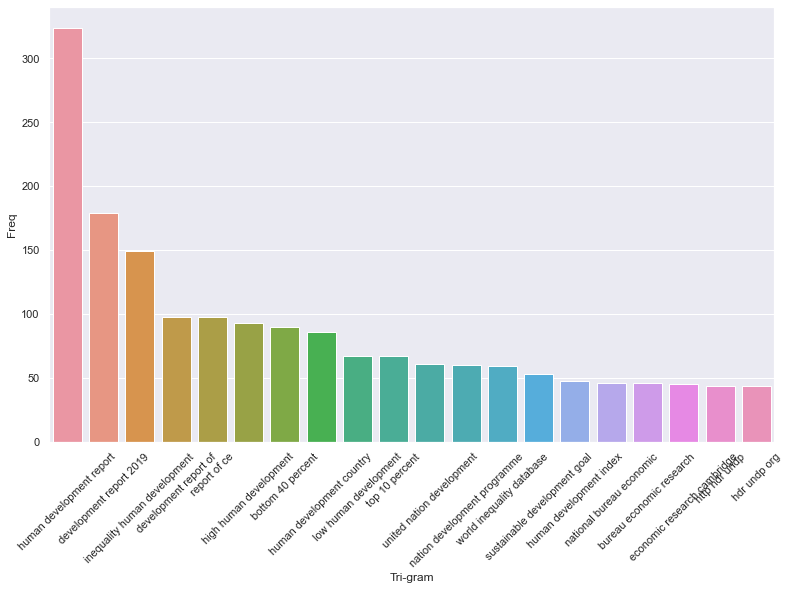

In [14]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## Topic Modeling

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [16]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(df['lemmatized'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix


,00,000,0000,0000top,0001,00010,00015,0002,00020,00025,...,ﬂ6,ﬂ7,ﬂ8notes,ﬂas,ﬂchapter,ﬂirony,ﬂmartinez,ﬂsasaﬂ,ﬂsource,ﬂthe
0,180,143,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,3,1


### Latent Dirichlet Allocation (LDA) Topic Modeling

In [17]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=50, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
development income inequality human 2019 country percent change global gender
Topic 1:
development inequality income country 2019 human percent evaluation use policy
Topic 2:
development inequality country income human 2019 percent change evaluation report
Topic 3:
development inequality 2019 income country human evaluation percent data climate
Topic 4:
development inequality country 2019 human change income percent 2018 data
Topic 5:
inequality development country income 2019 percent human report gender evaluation
Topic 6:
inequality development country 2019 change human income percent report world
Topic 7:
development inequality human 2019 country income change social climate percent
Topic 8:
development country inequality income human percent 2019 report climate change
Topic 9:
inequality development country human income 2019 percent change global evaluation


### pyLDAvis

In [18]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel


C:\Users\mwamb\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2     -45.310547 -31.623940       1        1  99.999536
9      44.638168 -90.260773       2        1   0.000052
8      96.620056 -54.829220       3        1   0.000052
6      81.334053  11.225585       4        1   0.000052
3      12.995265  -0.411700       5        1   0.000052
1       4.809537 -49.582943       6        1   0.000052
7     -30.841677  26.347441       7        1   0.000052
5     -19.414680 -93.935753       8        1   0.000052
4      33.989754  46.696636       9        1   0.000052
0      51.410755 -32.046501      10        1   0.000052, topic_info=      Category         Freq         Term        Total  loglift  logprob
16802  Default  1849.000000   inequality  1849.000000  30.0000  30.0000
13029  Default  1888.000000  development  1888.000000  29.0000  29.0000
12285  Default  1504.000000      country  1504.000000  28.0000  28.0000
16632  Default  1356.000000       income  1356.000000  27.0000  27.0000
16295  Default  1287.000000        human  1287.000000  26.0000  26.0000
...        ...          ...          ...          ...      ...      ...
19301  Topic10     0.000005     national   492.801391  -3.9815  -9.9577
20422  Topic10     0.000005       people   540.168587  -4.0722  -9.9566
24888  Topic10     0.000005       united   394.298914  -3.7687  -9.9679
9707   Topic10     0.000005         also   555.007504  -4.1010  -9.9583
21939  Topic10     0.000005       report   731.424906  -4.3726  -9.9539

[635 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
3          1  0.916458        0000top
204        1  0.917075          01611
255        1  0.916092          02016
280        1  0.917271          02344
312        1  0.915759    02713152low
...      ...       ...            ...
26220      1  0.915444     ﬁfostering
26319      1  0.916147            ﬁla
26340      1  0.915404           ﬁmar
26356      1  0.917160  ﬁmobilization
26568      1  0.916024    ﬁvegetarian

[336 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 9, 7, 4, 2, 8, 6, 5, 1])